In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [3]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [4]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [5]:
movies_ratings = pd.merge(ratings, movies, on="movieId")

In [6]:
movies_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [7]:
movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [8]:
movies_ratings = movies_ratings[['userId', 'movieId', 'genres', 'rating']]

In [9]:
movies_ratings.columns

Index(['userId', 'movieId', 'genres', 'rating'], dtype='object')

In [10]:
movies_ratings.head()

,userId,movieId,genres,rating
0,1,296,Comedy|Crime|Drama|Thriller,5.0
1,3,296,Comedy|Crime|Drama|Thriller,5.0
2,4,296,Comedy|Crime|Drama|Thriller,4.0
3,5,296,Comedy|Crime|Drama|Thriller,4.0
4,7,296,Comedy|Crime|Drama|Thriller,4.0


In [11]:
movies_ratings = movies_ratings.sort_values(by='userId', ascending=True)

In [12]:
movies_ratings.head()

,userId,movieId,genres,rating
0,1,296,Comedy|Crime|Drama|Thriller,5.0
195316,1,31956,Drama|Romance,3.5
100074,1,4973,Comedy|Romance,4.5
169663,1,7323,Comedy|Drama,3.5
194643,1,27721,Drama|Mystery|Romance|War,3.0


In [13]:
movies_ratings['genres'] = movies_ratings['genres'].str.split('|')
movies_ratings.head()

,userId,movieId,genres,rating
0,1,296,"[Comedy, Crime, Drama, Thriller]",5.0
195316,1,31956,"[Drama, Romance]",3.5
100074,1,4973,"[Comedy, Romance]",4.5
169663,1,7323,"[Comedy, Drama]",3.5
194643,1,27721,"[Drama, Mystery, Romance, War]",3.0


In [14]:
n_movies = movies_ratings['movieId'].nunique()
n_users = movies_ratings['userId'].nunique()

print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")

Number of unique movieId's: 44356
Number of unique users: 52811


In [15]:
movie_stats = ratings.groupby('userId')['movieId'].agg(['count'])
movie_stats.head()

,count
userId,
1,70
2,184
3,656
4,242
5,101


In [16]:
# للوصول إلى قيمة العدد للمستخدم ذي الـ userId المحدد
user_id = 5
count_for_user = movie_stats.loc[user_id, 'count']
print(f"The count for user {user_id} is: {count_for_user}")


The count for user 5 is: 101


In [17]:
# قم بتحويل البيانات إلى قاموس
user_movie_dict = {}

for user_id, count_for_user in movie_stats.iterrows():
    user_movie_dict[user_id] = count_for_user['count']

# طباعة النتائج لجميع المستخدمين
for user_id, count_for_user in user_movie_dict.items():
    print(f"The count for user {user_id} is: {count_for_user}")

Streaming output truncated to the last 5000 lines.
The count for user 47812 is: 185
The count for user 47813 is: 39
The count for user 47814 is: 24
The count for user 47815 is: 27
The count for user 47816 is: 44
The count for user 47817 is: 25
The count for user 47818 is: 331
The count for user 47819 is: 31
The count for user 47820 is: 116
The count for user 47821 is: 64
The count for user 47822 is: 202
The count for user 47823 is: 21
The count for user 47824 is: 461
The count for user 47825 is: 72
The count for user 47826 is: 50
The count for user 47827 is: 24
The count for user 47828 is: 27
The count for user 47829 is: 76
The count for user 47830 is: 56
The count for user 47831 is: 85
The count for user 47832 is: 72
The count for user 47833 is: 101
The count for user 47834 is: 318
The count for user 47835 is: 179
The count for user 47836 is: 62
The count for user 47837 is: 54
The count for user 47838 is: 898
The count for user 47839 is: 35
The count for user 47840 is: 23
The count fo

In [18]:
# استخدام user_id للحصول على قيمة المستخدم في القاموس
target_user_id = 2000

if target_user_id in user_movie_dict:
    count_for_target_user = user_movie_dict[target_user_id]
    print(f"The count for user {target_user_id} is: {count_for_target_user}")
else:
    print(f"المستخدم {target_user_id} لم يقم بتقييم أي أفلام.")

The count for user 2000 is: 21


In [19]:
user_movie_dict

{1: 70,
 2: 184,
 3: 656,
 4: 242,
 5: 101,
 6: 26,
 7: 25,
 8: 155,
 9: 178,
 10: 53,
 11: 24,
 12: 736,
 13: 412,
 14: 31,
 15: 70,
 16: 24,
 17: 29,
 18: 187,
 19: 458,
 20: 78,
 21: 103,
 22: 22,
 23: 371,
 24: 25,
 25: 87,
 26: 39,
 27: 60,
 28: 49,
 29: 34,
 30: 35,
 31: 399,
 32: 33,
 33: 23,
 34: 32,
 35: 50,
 36: 108,
 37: 64,
 38: 249,
 39: 29,
 40: 86,
 41: 199,
 42: 22,
 43: 420,
 44: 55,
 45: 44,
 46: 160,
 47: 70,
 48: 25,
 49: 25,
 50: 81,
 51: 20,
 52: 29,
 53: 27,
 54: 27,
 55: 50,
 56: 30,
 57: 355,
 58: 104,
 59: 362,
 60: 50,
 61: 314,
 62: 205,
 63: 40,
 64: 53,
 65: 34,
 66: 79,
 67: 126,
 68: 41,
 69: 149,
 70: 196,
 71: 36,
 72: 813,
 73: 39,
 74: 22,
 75: 465,
 76: 182,
 77: 45,
 78: 69,
 79: 22,
 80: 517,
 81: 23,
 82: 170,
 83: 28,
 84: 314,
 85: 68,
 86: 148,
 87: 33,
 88: 21,
 89: 188,
 90: 33,
 91: 151,
 92: 88,
 93: 123,
 94: 53,
 95: 216,
 96: 55,
 97: 67,
 98: 145,
 99: 72,
 100: 61,
 101: 122,
 102: 155,
 103: 32,
 104: 43,
 105: 31,
 106: 36,
 107: 27

In [20]:
# تفجير القائمة في عمود 'genres'
exploded_ratings = movies_ratings.explode('genres')

# استخدام groupby لتجميع البيانات بناءً على 'userId' و 'genres'، ثم حساب حجم كل مجموعة
user_genre_counts = exploded_ratings.groupby(['userId', 'genres']).size().reset_index(name='No.Of Frequency')

# طباعة النتائج
user_genre_counts.head()


,userId,genres,No.Of Frequency
0,1,Action,4
1,1,Adventure,11
2,1,Animation,2
3,1,Children,3
4,1,Comedy,23


In [21]:
from collections import Counter

genre_frequency = Counter(g for genres in movies_ratings['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Comedy': 2903906,
         'Crime': 1358068,
         'Drama': 3557539,
         'Thriller': 2194756,
         'Romance': 1462430,
         'Mystery': 652359,
         'War': 409921,
         'Fantasy': 920108,
         'Sci-Fi': 1399496,
         'Action': 2410867,
         'Adventure': 1891290,
         'Horror': 618200,
         'Musical': 313298,
         'Film-Noir': 79537,
         'Documentary': 104005,
         'Children': 692242,
         'Animation': 529734,
         'Western': 156577,
         'IMAX': 345583,
         '(no genres listed)': 8430})

In [22]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 3557539), ('Comedy', 2903906), ('Action', 2410867), ('Thriller', 2194756), ('Adventure', 1891290)]


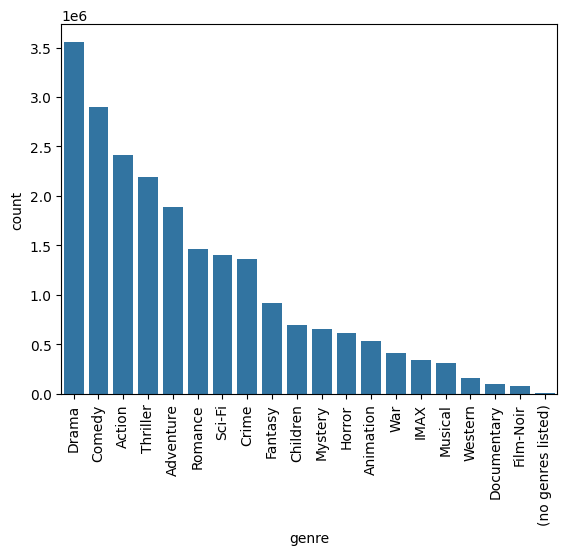

In [23]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [24]:
# قم بتحديد المستخدم
user_id_to_find = 2

# قم بالتكرار على كل الـ genres الممكنة
for genre_to_find in user_genre_counts['genres'].unique():
    # استخدم عملية الاستعلام للعثور على القيمة واستخراج القيمة بدلاً من القائمة
    frequency_value = user_genre_counts.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['No.Of Frequency'].values
    number_of_times = frequency_value[0] if len(frequency_value) > 0 else 0
    # قم بطباعة القيمة

    print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre_to_find}' is: [{number_of_times}]")


The No.Of Frequency for user '2' and genre 'Action' is: [66]
The No.Of Frequency for user '2' and genre 'Adventure' is: [75]
The No.Of Frequency for user '2' and genre 'Animation' is: [17]
The No.Of Frequency for user '2' and genre 'Children' is: [25]
The No.Of Frequency for user '2' and genre 'Comedy' is: [63]
The No.Of Frequency for user '2' and genre 'Crime' is: [18]
The No.Of Frequency for user '2' and genre 'Documentary' is: [0]
The No.Of Frequency for user '2' and genre 'Drama' is: [91]
The No.Of Frequency for user '2' and genre 'Fantasy' is: [29]
The No.Of Frequency for user '2' and genre 'Film-Noir' is: [0]
The No.Of Frequency for user '2' and genre 'Horror' is: [3]
The No.Of Frequency for user '2' and genre 'Musical' is: [11]
The No.Of Frequency for user '2' and genre 'Mystery' is: [8]
The No.Of Frequency for user '2' and genre 'Romance' is: [34]
The No.Of Frequency for user '2' and genre 'Sci-Fi' is: [28]
The No.Of Frequency for user '2' and genre 'Thriller' is: [30]
The No.O

In [ ]:
# قم بتكوين القاموس لتخزين النتائج
user_genre_dict = {}

# قم بالتكرار على كل الـ genres الممكنة وكل المستخدمين
for user_id, genre, number_of_times in user_genre_counts.itertuples(index=False):
    # استخدم الزوج (user_id, genre) كمفتاح للقاموس و `No.Of Frequency` كقيمة.
    user_genre_dict[(user_id, genre)] = number_of_times

# طباعة النتائج في القاموس
for (user_id, genre), number_of_times in user_genre_dict.items():
    print(f"The No.Of Frequency for user '{user_id}' and genre '{genre}' is: [{number_of_times}]")

Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '3897' and genre 'Children' is: [12]
The No.Of Frequency for user '3897' and genre 'Comedy' is: [26]
The No.Of Frequency for user '3897' and genre 'Crime' is: [5]
The No.Of Frequency for user '3897' and genre 'Drama' is: [24]
The No.Of Frequency for user '3897' and genre 'Fantasy' is: [10]
The No.Of Frequency for user '3897' and genre 'Horror' is: [1]
The No.Of Frequency for user '3897' and genre 'IMAX' is: [11]
The No.Of Frequency for user '3897' and genre 'Musical' is: [4]
The No.Of Frequency for user '3897' and genre 'Mystery' is: [4]
The No.Of Frequency for user '3897' and genre 'Romance' is: [10]
The No.Of Frequency for user '3897' and genre 'Sci-Fi' is: [9]
The No.Of Frequency for user '3897' and genre 'Thriller' is: [8]
The No.Of Frequency for user '3897' and genre 'War' is: [2]
The No.Of Frequency for user '3897' and genre 'Western' is: [1]
The No.Of Frequency for user '3898' and genre 'Action' is: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '11421' and genre 'Horror' is: [2]
The No.Of Frequency for user '11421' and genre 'IMAX' is: [18]
The No.Of Frequency for user '11421' and genre 'Musical' is: [2]
The No.Of Frequency for user '11421' and genre 'Mystery' is: [13]
The No.Of Frequency for user '11421' and genre 'Romance' is: [19]
The No.Of Frequency for user '11421' and genre 'Sci-Fi' is: [25]
The No.Of Frequency for user '11421' and genre 'Thriller' is: [38]
The No.Of Frequency for user '11421' and genre 'War' is: [10]
The No.Of Frequency for user '11421' and genre 'Western' is: [1]
The No.Of Frequency for user '11422' and genre 'Action' is: [103]
The No.Of Frequency for user '11422' and genre 'Adventure' is: [72]
The No.Of Frequency for user '11422' and genre 'Animation' is: [2]
The No.Of Frequency for user '11422' and genre 'Children' is: [14]
The No.Of Frequency for user '11422' and genre 'Comedy' is: [25]
The No.Of Frequency for user '114

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '19110' and genre 'Fantasy' is: [25]
The No.Of Frequency for user '19110' and genre 'Film-Noir' is: [6]
The No.Of Frequency for user '19110' and genre 'Horror' is: [109]
The No.Of Frequency for user '19110' and genre 'IMAX' is: [18]
The No.Of Frequency for user '19110' and genre 'Musical' is: [1]
The No.Of Frequency for user '19110' and genre 'Mystery' is: [39]
The No.Of Frequency for user '19110' and genre 'Romance' is: [15]
The No.Of Frequency for user '19110' and genre 'Sci-Fi' is: [79]
The No.Of Frequency for user '19110' and genre 'Thriller' is: [127]
The No.Of Frequency for user '19110' and genre 'War' is: [14]
The No.Of Frequency for user '19110' and genre 'Western' is: [18]
The No.Of Frequency for user '19111' and genre 'Action' is: [65]
The No.Of Frequency for user '19111' and genre 'Adventure' is: [48]
The No.Of Frequency for user '19111' and genre 'Animation' is: [4]
The No.Of Frequency for user 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '25781' and genre 'Children' is: [66]
The No.Of Frequency for user '25781' and genre 'Comedy' is: [219]
The No.Of Frequency for user '25781' and genre 'Crime' is: [54]
The No.Of Frequency for user '25781' and genre 'Documentary' is: [3]
The No.Of Frequency for user '25781' and genre 'Drama' is: [164]
The No.Of Frequency for user '25781' and genre 'Fantasy' is: [93]
The No.Of Frequency for user '25781' and genre 'Film-Noir' is: [1]
The No.Of Frequency for user '25781' and genre 'Horror' is: [76]
The No.Of Frequency for user '25781' and genre 'IMAX' is: [65]
The No.Of Frequency for user '25781' and genre 'Musical' is: [15]
The No.Of Frequency for user '25781' and genre 'Mystery' is: [51]
The No.Of Frequency for user '25781' and genre 'Romance' is: [98]
The No.Of Frequency for user '25781' and genre 'Sci-Fi' is: [175]
The No.Of Frequency for user '25781' and genre 'Thriller' is: [162]
The No.Of Frequency for u

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '31962' and genre 'Drama' is: [34]
The No.Of Frequency for user '31962' and genre 'Fantasy' is: [7]
The No.Of Frequency for user '31962' and genre 'Film-Noir' is: [2]
The No.Of Frequency for user '31962' and genre 'Horror' is: [22]
The No.Of Frequency for user '31962' and genre 'IMAX' is: [2]
The No.Of Frequency for user '31962' and genre 'Musical' is: [5]
The No.Of Frequency for user '31962' and genre 'Mystery' is: [8]
The No.Of Frequency for user '31962' and genre 'Romance' is: [16]
The No.Of Frequency for user '31962' and genre 'Sci-Fi' is: [9]
The No.Of Frequency for user '31962' and genre 'Thriller' is: [26]
The No.Of Frequency for user '31962' and genre 'War' is: [1]
The No.Of Frequency for user '31962' and genre 'Western' is: [1]
The No.Of Frequency for user '31963' and genre 'Action' is: [3]
The No.Of Frequency for user '31963' and genre 'Adventure' is: [2]
The No.Of Frequency for user '31963' and g

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '35687' and genre 'War' is: [7]
The No.Of Frequency for user '35687' and genre 'Western' is: [3]
The No.Of Frequency for user '35688' and genre 'Action' is: [19]
The No.Of Frequency for user '35688' and genre 'Adventure' is: [6]
The No.Of Frequency for user '35688' and genre 'Animation' is: [3]
The No.Of Frequency for user '35688' and genre 'Children' is: [5]
The No.Of Frequency for user '35688' and genre 'Comedy' is: [59]
The No.Of Frequency for user '35688' and genre 'Crime' is: [17]
The No.Of Frequency for user '35688' and genre 'Drama' is: [107]
The No.Of Frequency for user '35688' and genre 'Fantasy' is: [9]
The No.Of Frequency for user '35688' and genre 'Horror' is: [7]
The No.Of Frequency for user '35688' and genre 'IMAX' is: [1]
The No.Of Frequency for user '35688' and genre 'Musical' is: [1]
The No.Of Frequency for user '35688' and genre 'Mystery' is: [4]
The No.Of Frequency for user '35688' and ge

In [ ]:
user_genre_dict

In [ ]:
# قم بتحديد المستخدم
user_id_to_find = 1

# قم بتكوين القاموس لتخزين النتائج
user_genre_dict = {}

# قم بالتكرار على كل الـ genres الممكنة للمستخدم المحدد
for genre_to_find, number_of_times in user_genre_counts.query(f'userId == {user_id_to_find}').loc[:, ['genres', 'No.Of Frequency']].itertuples(index=False):
    # استخدم القيمة (genre) كمفتاح للقاموس و `No.Of Frequency` كقيمة.
    user_genre_dict[genre_to_find] = number_of_times

# طباعة النتائج في القاموس
for genre, number_of_times in user_genre_dict.items():
    print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre}' is: [{number_of_times}]")

In [ ]:
user_id_to_find = 1
genre_to_find = 'Drama'

# استخدم عملية الاستعلام للعثور على القيمة واستخراج القيمة بدلاً من القائمة
frequency_value = user_genre_counts.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['No.Of Frequency'].values
number_of_times = frequency_value[0] if len(frequency_value) > 0 else 0

# طباعة النتائج
print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre_to_find}' is: [{number_of_times}]")

In [ ]:
def user_behavior_probability(total_movies, genre_label_count):
    user_behavior_prob = genre_label_count / total_movies
    return round(user_behavior_prob, 3)


In [ ]:
user_behavior_probability(70, 4)

In [ ]:
# قم بتكوين القاموس لتخزين نتائج الاحتمالات لكل تصنيف (genre) لكل مستخدم
user_genre_probabilities = []

for user_id, genre, genre_count in user_genre_counts.itertuples(index=False):
    # احتمال تصنيف المستخدم للتصنيف (genre) الحالي
    probability = user_behavior_probability(user_movie_dict[user_id], genre_count)

    # استخدم الزوج (user_id, genre) كمفتاح للقاموس والاحتمال كقيمة
    user_genre_probabilities.append({'User_ID': user_id, 'Genre': genre, 'Probability': probability})

# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(user_genre_probabilities)

# استخدم pivot لتحويل البيانات إلى الشكل المطلوب
pivot_results = results_df.pivot(index='User_ID', columns='Genre', values='Probability')

# استخدام fillna لتعويض القيم الفارغة بصفر (إذا لزم الأمر)
pivot_results.fillna(0, inplace=True)

# ضبط إعدادات pandas لعرض جميع الصفوف والأعمدة
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pivot_results.head()

In [ ]:
user_id = 2

genre_name = 'Action'

# الحصول على قيمة معينة باستخدام loc
user_genre_probability = pivot_results.loc[user_id, genre_name]

print(f"The probability for User {user_id} in Genre {genre_name}: {user_genre_probability}")


In [ ]:

# قاموس لتخزين الاحتماليات لكل مستخدم وتصنيف
user_genre_probabilities_dict = {}

# iterate over each row (user) in the pivot_results DataFrame
for user_id, row in pivot_results.iterrows():
    # iterate over each column (genre) in the row
    for genre_name, user_genre_probability in row.items():
        # تخزين الاحتمالية في القاموس
        user_genre_probabilities_dict[(user_id, genre_name)] = user_genre_probability

# إنشاء DataFrame لتخزين متوسط احتماليات كل مستخدم
user_mean_df = pd.DataFrame(index=pivot_results.index, columns=['Mean_Probability'])

# حساب متوسط احتماليات كل مستخدم وتخزينه في DataFrame
for user_id in pivot_results.index:
    user_probabilities = [user_genre_probabilities_dict[(user_id, genre_name)] for genre_name in pivot_results.columns]
    mean_probability = np.mean(user_probabilities)

    # تخزين النتيجة في DataFrame
    user_mean_df.loc[user_id] = [mean_probability]

# طباعة DataFrame النتائج
user_mean_df.head()

In [ ]:
# قاموس لتخزين الاحتماليات لكل مستخدم وتصنيف
user_genre_probabilities_dict = {}

# iterate over each row (user) in the pivot_results DataFrame
for user_id, row in pivot_results.iterrows():
    # iterate over each column (genre) in the row
    for genre_name, user_genre_probability in row.items():
        # تخزين الاحتمالية في القاموس
        user_genre_probabilities_dict[(user_id, genre_name)] = user_genre_probability

# إنشاء DataFrame لتخزين متوسط احتماليات كل مستخدم
user_mean_df = pd.DataFrame(index=pivot_results.index, columns=pivot_results.index)

# حساب متوسط احتماليات كل مستخدم وتخزينه في DataFrame
for user_id1 in pivot_results.index:
    for user_id2 in pivot_results.index:
        # استخدام معادلة معامل بيرسون لحساب الشبه بين المستخدمين
        user1_probabilities = [user_genre_probabilities_dict[(user_id1, genre_name)] for genre_name in pivot_results.columns]
        user2_probabilities = [user_genre_probabilities_dict[(user_id2, genre_name)] for genre_name in pivot_results.columns]

        U1_mean = np.mean(user1_probabilities)
        U2_mean = np.mean(user2_probabilities)

        numerator = np.sum((np.array(user1_probabilities) - U1_mean) * (np.array(user2_probabilities) - U2_mean))
        denominator_U1 = np.sqrt(np.sum((np.array(user1_probabilities) - U1_mean)**2))
        denominator_U2 = np.sqrt(np.sum((np.array(user2_probabilities) - U2_mean)**2))

        PCC_UV = numerator / (denominator_U1 * denominator_U2)

        # تخزين النتيجة في DataFrame
        user_mean_df.loc[user_id1, user_id2] = PCC_UV

# طباعة DataFrame النتائج
user_mean_df.head()